/home/pmorenor/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-1.13943121e+00 -2.26430702e+00 -3.82897737e+00 -5.32103728e-01
 -1.56568835e-01 -3.26133962e+01 -7.58770868e+00 -1.26696350e+01
  8.85097810e-02  4.49129040e-01  2.23094881e+00  1.47172723e-02
  1.09952677e-03  2.35132108e+02  1.02191616e+01  4.45433156e+01]
[1.19402655e-02 1.95068444e-02 3.63295685e-02 5.53632299e-03
 1.21235861e-03 5.08857321e-02 5.89255228e-02 6.57474016e-02
 1.38187281e-03 6.56966781e-03 3.39645430e-02 2.29896674e-04
 1.61409520e-05 1.32973976e+00 1.34703002e-01 5.11184756e-01]


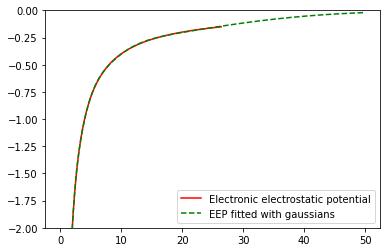

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit


def gaussians(r,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,b_0,b_1,b_2,b_3,b_4,b_5,b_6,b_7):
	return a_0*np.exp(-b_0*(r)**2)+a_1*np.exp(-b_1*(r)**2)+a_2*np.exp(-b_2*(r)**2)+a_3*np.exp(-b_3*(r)**2)+a_4*np.exp(-b_4*(r)**2)+a_4*np.exp(-b_4*(r)**2)+a_5*np.exp(-b_5*(r)**2)+a_6*np.exp(-b_6*(r)**2)+a_7*np.exp(-b_7*(r)**2)

def exponential_fit(r,a_0,a_1,a_2,b_0,b_1,b_2):
    return a_0*np.exp(b_0*r)+a_1*np.exp(b_1*r)+a_2*np.exp(b_2*r)
def nuclear_potential(r,Z=4):
    V_ne = [Z/i for i in r]
    return V_ne




def substract_nuclei_coulomb(V_total,V_ne):
    V_ee = [(i-j) for i,j in zip(V_total,V_ne)]
    return V_ee





#------------------------------------
# Retrieving the ESP data

ESP_data = pd.read_csv("line.txt", delim_whitespace=True, engine="python", header=None)
x = ESP_data[0].astype(float)[1:]
y = ESP_data[1].astype(float)
z = ESP_data[2].astype(float)
xr = ESP_data[0].astype(float)[1:]
v = ESP_data[4].astype(float)[1:]
# ----------------------------------



#------------------------------------
#Substracting nucleus-electron contribution
V_ne = nuclear_potential(x)
V_ee = substract_nuclei_coulomb(v,V_ne)

popt, pcov = curve_fit(gaussians, xdata = x, ydata = V_ee, maxfev=50000)
#popt, pcov = curve_fit(exponential_fit, xdata = x, ydata = V_ee, maxfev=5000000)

print(popt)
print(np.sqrt(np.diag(pcov)))

fit_parameters = np.split(popt, 2)
coefficients = fit_parameters[0]
exponents = fit_parameters[1]

angularMoment = list()
for i in range(0,len(exponents)):
    angularMoment.append(0)

potentialName = "ESP"
species="E+"

outFile = open (potentialName,"w")

outFile.write("O-"+species+"\n")
outFile.write("#\n")
outFile.write("%i\n" % (len(exponents)))

for i in range(0,len(exponents)) :
        outFile.write( str(i+1) + " "+ str(angularMoment[i])+"\n" )
        outFile.write( "%.8f %.8e\n" % (exponents[i], coefficients[i]) )
        aux = ""
        for k in range(0,3):
            aux = "0 0 0"
        outFile.write( aux + "\n")

outFile.close()

#print(gaussians(0,*popt))


plt.figure()
plt.plot(x,V_ee, color = "red",label="Electronic electrostatic potential")
#plt.plot(xr,v,color = "blue")
plt.plot(np.arange(0,50,0.1), gaussians(np.arange(0,50,0.1),*popt), color = "green", linestyle="dashed", label="EEP fitted with gaussians")
#plt.plot(x, exponential_fit(x,*popt), color = "green", linestyle="dashed", label="EEP fitted with gaussians")
plt.legend()
plt.ylim([-2,0])
plt.show()


In [2]:
fit_parameters = np.split(popt, 2)
coefficients = fit_parameters[0]
exponents = fit_parameters[1]
print(coefficients)
print(exponents)

[ -1.13943121  -2.26430702  -3.82897737  -0.53210373  -0.15656883
 -32.61339622  -7.58770868 -12.66963503]
[8.85097810e-02 4.49129040e-01 2.23094881e+00 1.47172723e-02
 1.09952677e-03 2.35132108e+02 1.02191616e+01 4.45433156e+01]


In [3]:
#Now we are going to extract the Be Vpc
angularMomentVpc = []
exponentsVpc = []
coefficientsVpc = []

Positron_PC_Potential = "BEPOSIPOT"

with open(Positron_PC_Potential, 'r') as inFile:
    lines = inFile.readlines()[3:]  # Skip the first 3 lines
    
    for i in range(0, len(lines), 3):  # Loop over every set of 4 lines starting from the 4th line
        # Read angular moment
        angularMomentVpc.append(float(lines[i].split()[1]))
        
        # Read exponent and coefficient
        exponentsVpc.append(float(lines[i+1].split()[0]))
        coefficientsVpc.append(float(lines[i+1].split()[1]))

# Now `angularMoment`, `exponents`, and `coefficients` are reconstructed.
print(coefficientsVpc)

[-0.000485261216, 0.00244417831, -0.00754488737, 0.0157738437, -0.0371036225, 0.0538567205, -0.197756262, 0.152115096, -2.23099311, 7.15444061, -16.4610761, 120.06745, -1010.44414, 5912.51755, -22883.6471, 58320.2479, -96733.7399, 100515.593, -59492.9273, 15337.5181, -108.319453, 58.7242217, -33.9818623, 10.1503518, -0.203970181]


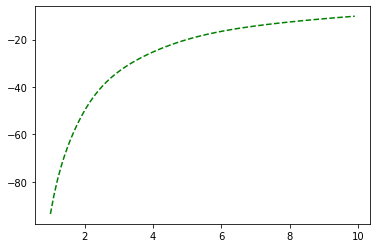

In [4]:
def Polarization_Correlation_Potential(r,a,b):
    value = 0.0
    for i,j in zip(a,b):
        value += i*np.exp(-j*r**2)
    return value

def total_potential(r,a,b):
    value = 0.0
    for i,j in zip(a,b):
        value += i*np.exp(-j*r**2) + gaussians(r,*popt)
    return value


plt.figure()
#plt.plot(np.arange(0,10,0.1),Polarization_Correlation_Potential(np.arange(0,10,0.1),coefficientsVpc,exponentsVpc))
#plt.plot(np.arange(0,10,0.1), gaussians(np.arange(0,10,0.1),*popt), color = "green", linestyle="dashed", label="EEP fitted with gaussians")
plt.plot(np.arange(1,10,0.1), total_potential(np.arange(1,10,0.1),coefficientsVpc,exponentsVpc), color = "green", linestyle="dashed", label="EEP fitted with gaussians")
#plt.ylim([-2,1])
plt.show()
    

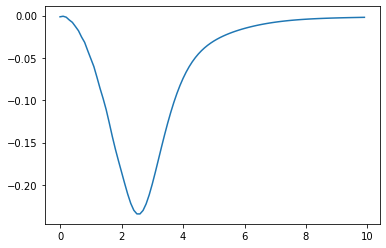

In [5]:
plt.figure()
plt.plot(np.arange(0,10,0.1),Polarization_Correlation_Potential(np.arange(0,10,0.1),coefficientsVpc,exponentsVpc))

plt.show()

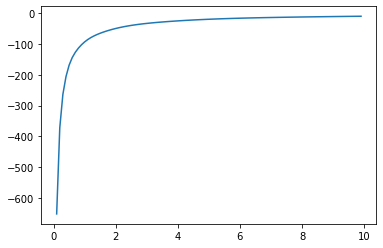

In [6]:
total_potential_data = [total_potential(i,coefficientsVpc,exponentsVpc) for i in np.arange(0.1,10,0.1)]
plt.plot(np.arange(0.1,10,0.1),total_potential(np.arange(0.1,10,0.1),coefficientsVpc,exponentsVpc) )
plt.show()

In [7]:
total_potential_data = [total_potential(i,coefficientsVpc,exponentsVpc) for i in np.arange(0.1,10,0.1)]
popt2, pcov2 = curve_fit(gaussians, xdata = np.arange(0.1,10,0.1), ydata = total_potential_data, maxfev=5000)
plt.figure()
#plt.plot(np.arange(0.1,10,0.1), gaussians(np.arange(0.1,10,0.1),*popt2), color = "green", linestyle="dashed", label="EEP fitted with gaussians")
plt.plot(np.arange(0.1,10,0.1), total_potential_data, color = "green", linestyle="dashed", label="EEP fitted with gaussians")
plt.plot()


<ipython-input-1-436eccc36bbc>:8: RuntimeWarning: overflow encountered in exp
  return a_0*np.exp(-b_0*(r)**2)+a_1*np.exp(-b_1*(r)**2)+a_2*np.exp(-b_2*(r)**2)+a_3*np.exp(-b_3*(r)**2)+a_4*np.exp(-b_4*(r)**2)+a_4*np.exp(-b_4*(r)**2)+a_5*np.exp(-b_5*(r)**2)+a_6*np.exp(-b_6*(r)**2)+a_7*np.exp(-b_7*(r)**2)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

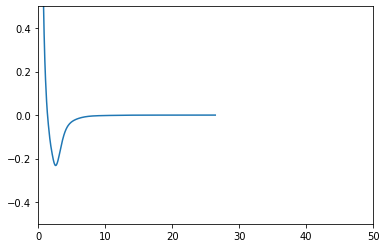

In [8]:

V_pc = [Polarization_Correlation_Potential(i,coefficientsVpc,exponentsVpc) for i in x]

V_total = [i + j for i,j in zip(v,V_pc)]

plt.figure()
#plt.plot(x,V_pc)
plt.ylim([-0.5,0.5])
plt.xlim([0.0,50])
plt.plot(x,V_total)
plt.show()


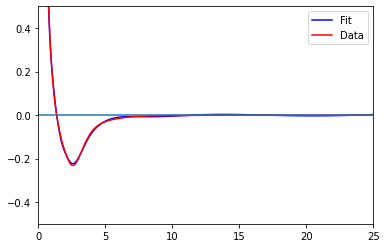

In [9]:
V_pc = Polarization_Correlation_Potential(x,coefficientsVpc,exponentsVpc) 
#V_ee = exponential_fit(x,*popt)
V_ee = gaussians(x,*popt)

V_N = nuclear_potential(x)

V_total_fits = [i+j+k for i,j,k in zip(V_N,V_ee,V_pc)]

V_ee_epc = [i+j for i,j in zip(V_ee,V_pc)]

V_total_data = [i + j for i,j in zip(v,V_pc)]


plt.figure()
#plt.plot(x,V_total[0])
plt.plot(x,V_total_fits, color = "blue", label = "Fit")
plt.plot(x,V_total_data, color = "red", label = "Data")
plt.axhline(y=0)
plt.legend()
plt.ylim([-0.5,0.5])
plt.xlim([0.0,25])
plt.show()

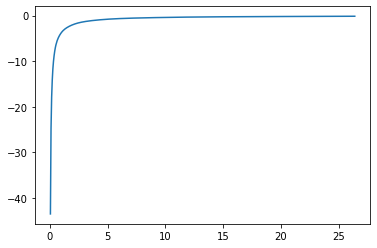

In [10]:
plt.figure()
plt.plot(x,V_ee)
plt.show()

In [11]:

non_negative_exponents=[-i for i in exponents]

total_angularMomentum = [*angularMomentVpc, *angularMoment]
total_coefficients = [*coefficientsVpc, *coefficients]
total_exponents = [*exponentsVpc, *non_negative_exponents]


potentialName = "EPCPOT"
species="E+"

outFile = open (potentialName,"w")

outFile.write("O-"+species+"\n")
outFile.write("#\n")
outFile.write("%i\n" % (len(total_exponents)))

for i in range(0,len(total_exponents)) :
        outFile.write( str(i+1) + " "+ str(int(total_angularMomentum[i]))+"\n" )
        outFile.write( "%.8f %.8e\n" % (total_exponents[i], total_coefficients[i]) )
        aux = ""
        for k in range(0,3):
            aux = "0 0 0"
        outFile.write( aux + "\n")

outFile.close()


In [12]:
angularMomentTotal = []
exponentsTotal = []
coefficientsTotal = []

Pot = "CONTRIB"

with open(Pot, 'r') as inFile:
    lines = inFile.readlines()[3:]  # Skip the first 3 lines
    for i in range(0, len(lines), 3):  # Loop over every set of 4 lines starting from the 4th line
        # Read angular moment
        angularMomentTotal.append(float(lines[i].split()[1]))
        
        # Read exponent and coefficient
        exponentsTotal.append(float(lines[i+1].split()[0]))
        coefficientsTotal.append(float(lines[i+1].split()[1]))



def potential(r,a,b):
    value = 0
    for i,j in zip(a,b):
        value += i*np.exp(-j*r**2)
    return value

print(len(coefficientsTotal))

total_potential = potential(x,coefficientsTotal,exponentsTotal)

plt.figure()
plt.plot(x,total_potential, color = "blue", label = "Lowdin potential")
#plt.plot(np.arange(0,10,0.1),Polarization_Correlation_Potential(np.arange(0,10,0.1),coefficientsVpc,exponentsVpc), color = "orange")
plt.plot(x,V_ee_epc, color = "red", label = "Data potential")
plt.legend()
#plt.ylim([-4,0])
plt.xlim([0.0,4.0])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'CONTRIB'

In [13]:
V_N = nuclear_potential(x)
popt3,pcov3 = curve_fit(gaussians, xdata=x, ydata=V_N)

plt.figure()
plt.plot(x,V_N)
plt.scatter(x,gaussians(x,*popt3))

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(x,V_N)
plt.scatter(x,gaussians(x,*popt3))
fit_parameters_V_N = np.split(popt3, 2)

coefficientsV_N = fit_parameters_V_N[0]
exponentsV_N = fit_parameters_V_N[1]


In [ ]:
print(popt)
print(coefficientsVpc)
print(exponents)

In [ ]:
total_angularMomentum = [*angularMomentVpc, *angularMoment, *angularMoment]
total_coefficients = [*coefficientsVpc, *coefficients, *coefficientsV_N]
total_exponents = [*exponentsVpc, *exponents, *exponentsV_N]


def total_potential(r,a,b):
    value = 0.0
    for i,j in zip(total_coefficients,total_exponents):
        value += i*np.exp(-j*r**2)
    return value


plt.figure()
plt.plot(x,total_potential(x,total_coefficients,total_exponents))
plt.axhline(y=0)
plt.ylim([-0.5,0.5])
plt.xlim([0.0,25])
plt.show()

In [ ]:
potentialName = "FULLPOTENTIAL"
species="E+"

outFile = open (potentialName,"w")

outFile.write("O-"+species+"\n")
outFile.write("#\n")
outFile.write("%i\n" % (len(total_exponents)))

for i in range(0,len(total_exponents)) :
        outFile.write( str(i+1) + " "+ str(int(total_angularMomentum[i]))+"\n" )
        outFile.write( "%.8f %.8e\n" % (total_exponents[i], total_coefficients[i]) )
        aux = ""
        for k in range(0,3):
            aux = "0 0 0"
        outFile.write( aux + "\n")

outFile.close()

In [18]:
datapath="/home/pmorenor/Desktop/PositronWork/H-/H-_normal/dataHminus2.dat"


def gaussians2(r,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,b_0,b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9):
	return a_0*np.exp(-b_0*(r)**2)+a_1*np.exp(-b_1*(r)**2)+a_2*np.exp(-b_2*(r)**2)+a_3*np.exp(-b_3*(r)**2)+a_4*np.exp(-b_4*(r)**2)+a_5*np.exp(-b_5*(r)**2)+a_6*np.exp(-b_6*(r)**2)+a_7*np.exp(-b_7*(r)**2)+a_8*np.exp(-b_8*(r)**2)+a_9*np.exp(-b_9*(r)**2)

def gaussians3(r,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,b_0,b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9):
	return a_0*np.exp(-b_0*(r-10)**2)+a_1*np.exp(-b_1*(r-10)**2)+a_2*np.exp(-b_2*(r-10)**2)+a_3*np.exp(-b_3*(r-10)**2)+a_4*np.exp(-b_4*(r-10)**2)+a_5*np.exp(-b_5*(r-10)**2)+a_6*np.exp(-b_6*(r-10)**2)+a_7*np.exp(-b_7*(r-10)**2)+a_8*np.exp(-b_8*(r-10)**2)+a_9*np.exp(-b_9*(r-10)**2)



Data = pd.read_csv(datapath, delim_whitespace=True, engine="python", header=None)


r = Data[0].astype(float)
r_Bohr = pd.Series([i*1.8897259886 for i in r])
V_ee = Data[2].astype(float)
V_Total = Data[3].astype(float)


popt_ee, pcov_ee = curve_fit(gaussians, xdata=r_Bohr, ydata = V_ee, maxfev=50000)
popt_total, pcov_total = curve_fit(gaussians2, xdata=r_Bohr, ydata= V_Total, maxfev=50000)



/home/pmorenor/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)



non_negative_exponents=[-i for i in exponents]

total_angularMomentum = [*angularMomentVpc, *angularMoment]
total_coefficients = [*coefficientsVpc, *coefficients]
total_exponents = [*exponentsVpc, *non_negative_exponents]


potentialName = "EPCPOT"
species="E+"

outFile = open (potentialName,"w")

outFile.write("O-"+species+"\n")
outFile.write("#\n")
outFile.write("%i\n" % (len(total_exponents)))

for i in range(0,len(total_exponents)) :
        outFile.write( str(i+1) + " "+ str(int(total_angularMomentum[i]))+"\n" )
        outFile.write( "%.8f %.8e\n" % (total_exponents[i], total_coefficients[i]) )
        aux = ""
        for k in range(0,3):
            aux = "0 0 0"
        outFile.write( aux + "\n")

outFile.close()


In [ ]:
plt.figure()
plt.plot(r_Bohr,V_ee, color = "red", label = "$V_{ee}$")
plt.scatter(r_Bohr,gaussians(r_Bohr,*popt_ee), color = "blue", label = "Fit")
plt.legend()
#plt.xlim(-2,10)
#plt.ylim(-1,0)
plt.show()

#print(popt_ee)
#print(np.sqrt(np.diag(pcov_ee)))

In [ ]:
https://stackoverflow.com/questions/8196744/dynamically-define-a-function
plt.figure()
#plt.plot(r_Bohr,V_Total, color = "red", label = "$V_{Total}$")
#plt.scatter(r_Bohr,gaussians2(r_Bohr,*popt_total), color = "blue", label = "Fitted")
plt.plot(np.arange(-30,30,0.1),gaussians3(np.arange(-30,30,0.1),*popt_total), color = "red", label = "Fitted")
plt.plot(np.arange(-30,30,0.1),gaussians2(np.arange(-30,30,0.1),*popt_total), color = "blue", label = "Fitted")
plt.axhline(y=0, color = "black", linestyle="dashed" )


plt.legend()
plt.xlim(0,5)
plt.ylim(-0.325,1)
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
ax.plot(r_Bohr,V_Total, color = "red", label = "$V_{Total}$")
ax.scatter(r_Bohr,gaussians2(r_Bohr,*popt_total), color = "blue", label = "Fitted")
#ax.scatter(np.arange(-30,30,0.5),gaussians2(np.arange(-30,30,0.5),*popt_total), color = "blue", label = "Fitted")

ax.set_xlabel("Å")
ax.set_ylabel('a.u.')
#ax.set_title('Total potential vs Distance')
ax.set_xlim(-2,30)
ax.set_ylim(-2,20)
ax.legend(loc="upper left")
#ax.axhline(y=0)

x_min, x_max = 0, 3
y_min, y_max = -0.325,-0.2

# Add an inset axes (zoomed-in plot)
axins = inset_axes(ax, width="30%", height="30%", loc='upper right')  # inset size and location

# Plot the zoomed region in the inset
axins.plot(r_Bohr,V_Total, color = "red")
axins.scatter(r_Bohr,gaussians2(r_Bohr,*popt_total), color = "blue")
axins.set_xlim(x_min, x_max)
axins.set_ylim(y_min, y_max)

# Add a rectangle patch on the original plot to show where the zoomed area is
#ax.indicate_inset_zoom(axins)

#plt.show()
plt.savefig("VtotalVsDistance.png")

NameError: name 'r_Bohr' is not defined

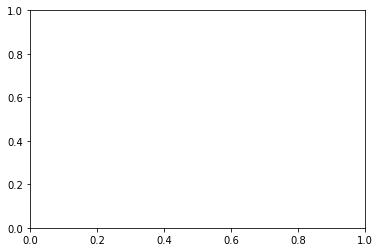

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
ax.plot(r_Bohr,V_ee, color = "red", label = "$V_{elec}$")
ax.scatter(r_Bohr,gaussians(r_Bohr,*popt_ee), color = "blue", label = "Fitted")
ax.set_xlabel("Å")
ax.set_ylabel('a.u.')
#ax.set_title('Total potential vs Distance')
ax.set_xlim(-2,30)
ax.set_ylim(-1.3,1)
ax.legend(loc="upper left")
#ax.axhliney=0)

x_min, x_max = 1, 5
y_min, y_max = -0.7,-0.2

# Add an inset axes (zoomed-in plot)
axins = inset_axes(ax, width="30%", height="30%", loc='upper right')  # inset size and location

# Plot the zoomed region in the inset
axins.plot(r_Bohr,V_ee, color = "red")
axins.scatter(r_Bohr,gaussians(r_Bohr,*popt_ee), color = "blue")
axins.set_xlim(x_min, x_max)
axins.set_ylim(y_min, y_max)

# Add a rectangle patch on the original plot to show where the zoomed area is
#ax.indicate_inset_zoom(axins)

#plt.show()
plt.savefig("VelecDistance.png")

In [ ]:
def write_potential_to_lowdin_format(potentialName,species,angularMomentum,fitting_parameters,center):
    
    
    parameters = np.split(fitting_parameters, 2)
    
    coefficients = parameters[0]
    exponents = parameters[1]
    
    outFile = open(potentialName, "w")
    
    outFile.write("O-"+species+"\n")
    outFile.write("#\n")
    outFile.write("%i\n" % (len(exponents)))
    
    for i in range(0,len(exponents)) :
        outFile.write( str(i+1) + " "+ str(int(angularMomentum[i]))+"\n" )
        outFile.write( "%.8f %.8e\n" % (exponents[i], coefficients[i]) )
        
        aux = str(center[0])+" "+str(center[1])+" "+str(center[2])
        """
        aux = ""
        for k in range(0,3):
            aux = "0 0 0"
        """
        outFile.write( aux + "\n")

    outFile.close()
    

In [ ]:
L = [0 for i in range(0,len(popt_total))]


print(popt_ee)
print(popt_total)

write_potential_to_lowdin_format("HEEBOHR","E+",L,popt_ee)
write_potential_to_lowdin_format("HTOBOHR","E+",L,popt_total)



In [ ]:
L = [0 for i in range(0,len(popt_total))]
write_potential_to_lowdin_format("HCENTER","E+",L,popt_total,[2.0,0,0])

In [16]:
two_atom = [i+j for i,j in zip(gaussians2(np.arange(-10,20,0.1),*popt_total),gaussians3(np.arange(-10,20,0.1),*popt_total))]


ESP_data = pd.read_csv("/home/pmorenor/Desktop/PositronWork/H2-/line.txt", delim_whitespace=True, engine="python", header=None)
x = ESP_data[0].astype(float)[1:]
y = ESP_data[1].astype(float)
z = ESP_data[2].astype(float)
xr = ESP_data[0].astype(float)[1:]
v = ESP_data[4].astype(float)[1:]
x_Bohr = pd.Series([i*1.8897259886 for i in x])


plt.figure()
plt.scatter(np.arange(-10,20,0.1),two_atom, color="red")
plt.axhline(y=0, color = "black")
plt.plot(x_Bohr,v, color = "blue")
plt.ylim(-0.5,1)
plt.show()

NameError: name 'gaussians2' is not defined

In [ ]:
def harmonic_potential(r,b):
    return b*r**2 

data_experiment_1 = harmonic_potential(np.arange(0,2,0.1),0.5)
data_experiment_2 = [4.5-1/i for i in np.arange(2,20,0.1)]

data_total = [*data_experiment_1,*data_experiment_2]


plt.figure()
plt.plot(np.arange(0,20,0.1), data_total)
plt. xlim
plt.show()

In [ ]:
popt_harmonic, pcov_harmonic = curve_fit(gaussians, xdata=np.arange(0,20,0.1), ydata=data_total,maxfev=50000)

In [ ]:
plt.figure()
plt.scatter(np.arange(0,20,0.1), gaussians(np.arange(0,20,0.1),*popt_harmonic))
plt.plot(np.arange(0,20,0.1), data_total)
plt. xlim
plt.show()

In [ ]:
write_potential_to_lowdin_format("HARMONICPOT","E+",L,popt_harmonic)


In [ ]:
print(gaussians(0,*popt_harmonic))

In [ ]:
print(gaussians(1.10,*popt_total))


In [15]:
ESP_data = pd.read_csv("/home/pmorenor/Desktop/PositronWork/H-/H-_normal/line.txt", delim_whitespace=True, engine="python", header=None)
x = ESP_data[0].astype(float)
y = ESP_data[1].astype(float)
z = ESP_data[2].astype(float)
xr = ESP_data[3].astype(float)
v = ESP_data[4].astype(float)


v_ee_multi = [i - 4/j for i,j in zip(v[1:],x[1:])]


plt.figure()
plt.plot(r,V_Total)
plt.scatter(xr,v, color="red")
plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()

NameError: name 'r' is not defined

<Figure size 432x288 with 0 Axes>

NameError: name 'r' is not defined

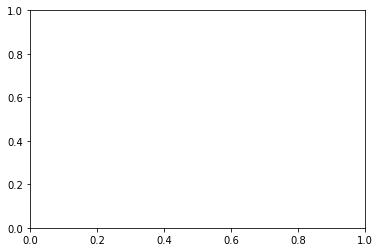

In [14]:
fig, ax = plt.subplots()
ax.plot(r,V_Total, color = "red", label = "$V_{Total}$")
ax.scatter(xr,v, color = "blue", label = "Multiwfn")
ax.set_xlabel("Å")
ax.set_ylabel('a.u.')
#ax.set_title('Total potential vs Distance')
ax.set_xlim(-2,30)
ax.set_ylim(-2,20)
ax.legend(loc="upper left")
#ax.axhline(y=0)

x_min, x_max = 0, 3
y_min, y_max = -0.325,-0.2

# Add an inset axes (zoomed-in plot)
axins = inset_axes(ax, width="30%", height="30%", loc='upper right')  # inset size and location

# Plot the zoomed region in the inset
axins.plot(r,V_Total, color = "red")
axins.scatter(xr,v, color = "blue")
axins.set_xlim(x_min, x_max)
axins.set_ylim(y_min, y_max)

# Add a rectangle patch on the original plot to show where the zoomed area is
#ax.indicate_inset_zoom(axins)

#plt.show()
plt.savefig("LowdinVsMultiwfn.png")

In [ ]:
from tabulate import tabulate

parameters_vtotal = np.split(popt_total,2)
errors_vtotal = np.split(np.sqrt(np.diag(pcov_total)),2)
table_parameters_total = np.transpose([parameters_vtotal[0], errors_vtotal[0],parameters_vtotal[1], errors_vtotal[1]])


print(tabulate(table_parameters_total, tablefmt="latex", floatfmt=".4f"))

In [ ]:
parameters_vee = np.split(popt_ee,2)
errors_vee = np.split(np.sqrt(np.diag(pcov_ee)),2)
table_parameters_vee = np.transpose([parameters_vee[0], errors_vee[0],parameters_vee[1], errors_vee[1]])


print(tabulate(table_parameters_vee, tablefmt="latex", floatfmt=".4f"))

In [ ]:
print(popt_total)
print(parameters_vtotal[0])